# Bengaluru House Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [4]:
df.head(20)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
df.duplicated().sum()

529

In [7]:
df.drop_duplicates(inplace=True)
# Remove Duplicates

In [8]:
df.reset_index(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12791 entries, 0 to 12790
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         12791 non-null  int64  
 1   area_type     12791 non-null  object 
 2   availability  12791 non-null  object 
 3   location      12790 non-null  object 
 4   size          12775 non-null  object 
 5   society       7463 non-null   object 
 6   total_sqft    12791 non-null  object 
 7   bath          12718 non-null  float64
 8   balcony       12186 non-null  float64
 9   price         12791 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 999.4+ KB


In [10]:
df.isnull().sum()

index              0
area_type          0
availability       0
location           1
size              16
society         5328
total_sqft         0
bath              73
balcony          605
price              0
dtype: int64

<Axes: >

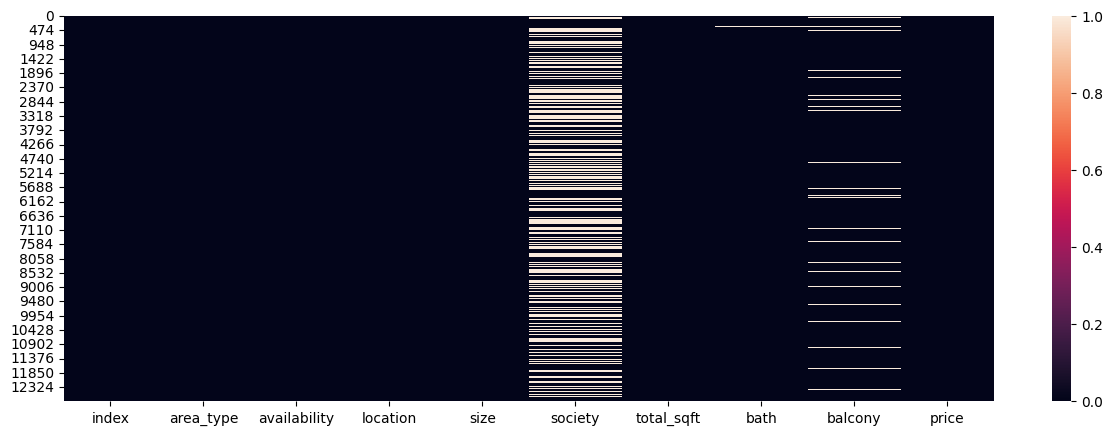

In [11]:
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull())

In [12]:
df.drop(columns=['society','index'],inplace=True)
df

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
12786,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,1715,3.0,3.0,112.00
12787,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
12788,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,NaN,400.00
12789,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00


In [13]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [14]:
df['BuiltUp_Area']= df['area_type'].apply(lambda x:1 if 'built-up' in x.lower() else 0)
df['Plot_Area']= df['area_type'].apply(lambda x:1 if 'Plot' in x else 0)
df['Carpet_Area']= df['area_type'].apply(lambda x:1 if 'Carpet' in x else 0)
# Destribute area_tye column
df[['area_type','BuiltUp_Area','Plot_Area','Carpet_Area']].head()

,area_type,BuiltUp_Area,Plot_Area,Carpet_Area
0,Super built-up Area,1,0,0
1,Plot Area,0,1,0
2,Built-up Area,1,0,0
3,Super built-up Area,1,0,0
4,Super built-up Area,1,0,0


In [15]:
df.drop(columns=['availability'],inplace=True)
# availability is not effect on price
df.head()

,area_type,location,size,total_sqft,bath,balcony,price,BuiltUp_Area,Plot_Area,Carpet_Area
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1,0,0
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,0,1,0
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1,0,0
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1,0,0
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00,1,0,0


In [16]:
print(df['location'].isnull().sum())
df.dropna(subset=['location'],inplace=True)
# drop row where location is NaN

1


In [17]:
print(df['size'].isnull().sum())
df.dropna(subset=['size'],inplace=True)
#  drop row where size is NaN

16


In [18]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [19]:
df['BedRoom'] = df['size'].apply(lambda x: x.split(' ')[0]).astype('int64')
df['Hall'] = df['size'].apply(lambda x:1 if 'BHK' in  x else 0).astype('int64')
df['Kitchen'] = df['size'].apply(lambda x: 1 if 'BHK' in x or 'RK' in x else 0).astype('int64')
# destribute size column
df[['size','BedRoom','Hall','Kitchen']].head(10)

,size,BedRoom,Hall,Kitchen
0,2 BHK,2,1,1
1,4 Bedroom,4,0,0
2,3 BHK,3,1,1
3,3 BHK,3,1,1
4,2 BHK,2,1,1
5,2 BHK,2,1,1
6,4 BHK,4,1,1
7,4 BHK,4,1,1
8,3 BHK,3,1,1
9,6 Bedroom,6,0,0


In [20]:
df['Num_total'] = df['total_sqft'].apply(lambda x: x  if '-' in x else ''.join(c for c in x if c.isdigit() or c == '.')).apply(lambda x: '.'.join(x.split('.')[:-1]) if x.split('.')[-1]== '' else x)
# Remove Character from series elemnets (Some Elemnets Have like sq. Meter etc..)

In [21]:
def Converts(x):
    if 'Meter' in x:
        return 10.76
    elif 'Perch' in x:
        return 272.25
    elif 'Yards' in x:
        return 9
    elif 'Acres' in x:
        return 43560
    elif 'Guntha' in x:
        return 1089
    else:
        return 1
df['convert_sqft'] = df['total_sqft'].apply(Converts)
# Convert other units into sqft

In [22]:
df['sqft'] = df['Num_total'].apply(lambda x: sum(float(i) for i in x.split(' - '))/2 if '-' in x else x)
# get average of range data

In [23]:
df['Final_sqft'] = df['sqft'].astype('Float64') * df['convert_sqft'].astype('Float64')
# Convert all data in final Format (je unit ne sqft ma convert krya hta tene value sathe Multi ply krya)
df[['total_sqft','convert_sqft','Num_total','sqft','Final_sqft']].head()

,total_sqft,convert_sqft,Num_total,sqft,Final_sqft
0,1056,1.0,1056,1056,1056.0
1,2600,1.0,2600,2600,2600.0
2,1440,1.0,1440,1440,1440.0
3,1521,1.0,1521,1521,1521.0
4,1200,1.0,1200,1200,1200.0


In [24]:
print(df['bath'].isnull().sum())
df['bath'] = df['bath'].fillna(df['BedRoom']).astype('Int64')
df[['bath','BedRoom']].head()

57


,bath,BedRoom
0,2,2
1,5,4
2,2,3
3,3,3
4,2,2


In [25]:
print(df['balcony'].isnull().sum())
df['balcony'] = df['balcony'].fillna(0).astype('Int64')
df['balcony'].head()

589


0    1
1    3
2    3
3    1
4    1
Name: balcony, dtype: Int64

In [26]:
df.reset_index(inplace=True)

In [27]:
df.drop(columns=['index','area_type','size','total_sqft','Num_total','convert_sqft','sqft'],inplace=True)

In [28]:
df

,location,bath,balcony,price,BuiltUp_Area,Plot_Area,Carpet_Area,BedRoom,Hall,Kitchen,Final_sqft
0,Electronic City Phase II,2,1,39.07,1,0,0,2,1,1,1056.0
1,Chikka Tirupathi,5,3,120.00,0,1,0,4,0,0,2600.0
2,Uttarahalli,2,3,62.00,1,0,0,3,1,1,1440.0
3,Lingadheeranahalli,3,1,95.00,1,0,0,3,1,1,1521.0
4,Kothanur,2,1,51.00,1,0,0,2,1,1,1200.0
...,...,...,...,...,...,...,...,...,...,...,...
12769,Green Glen Layout,3,3,112.00,1,0,0,3,1,1,1715.0
12770,Whitefield,4,0,231.00,1,0,0,5,0,0,3453.0
12771,Richards Town,5,0,400.00,1,0,0,4,1,1,3600.0
12772,Raja Rajeshwari Nagar,2,1,60.00,1,0,0,2,1,1,1141.0


### Remove OutLiers

In [29]:
df.describe()

,bath,balcony,price,BuiltUp_Area,Plot_Area,Carpet_Area,BedRoom,Hall,Kitchen,Final_sqft
count,12774.0,12774.0,12774.000000,12774.000000,12774.000000,12774.000000,12774.000000,12774.000000,12774.000000,12774.0
mean,2.710897,1.509316,114.339147,0.838735,0.154454,0.006811,2.817833,0.804212,0.805229,1884.421577
std,1.356957,0.869213,151.506067,0.367790,0.361398,0.082249,1.311892,0.396822,0.396040,16673.259942
min,1.0,0.0,8.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.0
25%,2.0,1.0,50.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1100.0
50%,2.0,2.0,73.000000,1.000000,0.000000,0.000000,3.000000,1.000000,1.000000,1280.0
75%,3.0,2.0,121.000000,1.000000,0.000000,0.000000,3.000000,1.000000,1.000000,1692.0
max,40.0,3.0,3600.000000,1.000000,1.000000,1.000000,43.000000,1.000000,1.000000,1306800.0


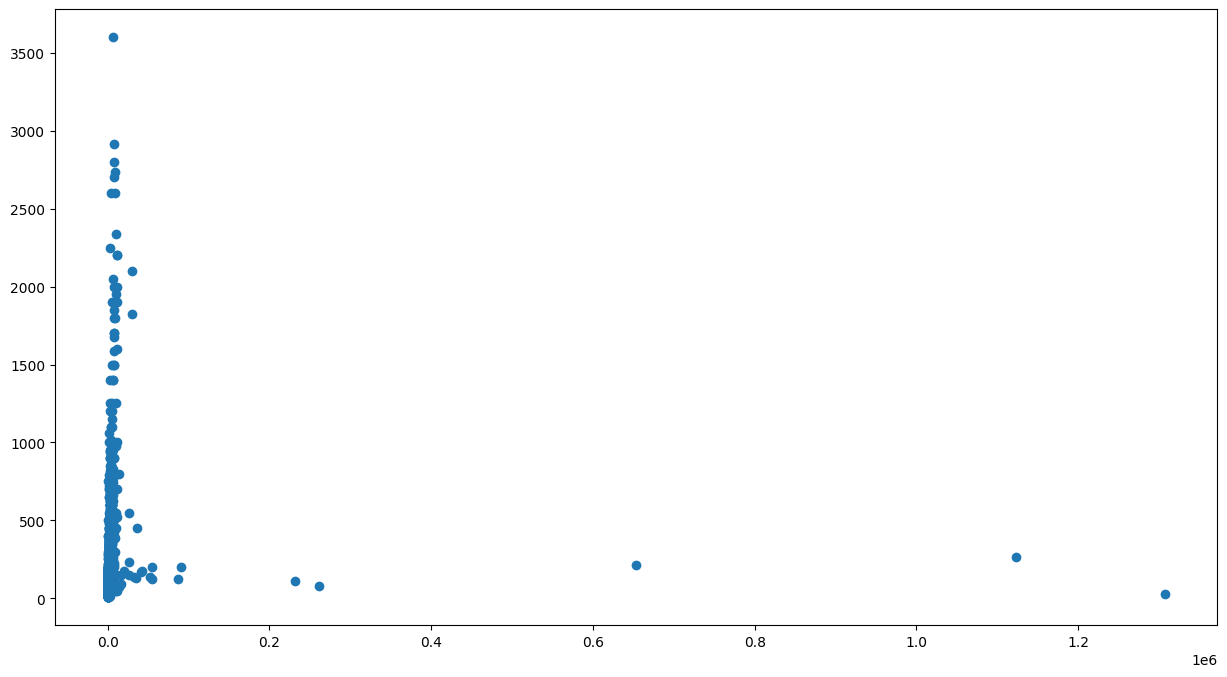

In [30]:
plt.figure(figsize=(15,8))
plt.scatter(df['Final_sqft'],df['price'])

In [31]:
df1 = df.copy()

In [32]:
price_q1 = df1['price'].quantile(0.25)
price_q3 = df1['price'].quantile(0.75)
price_iqr = price_q3-price_q1
print(price_q1,price_q3,price_iqr)
lower_price = price_q1 - (price_iqr * 1.5)
upper_price = price_q3 + (price_iqr * 1.5)
print(lower_price,upper_price)
df1 = df1[(df1['price']<=upper_price) & (df1['price']>=lower_price)]

50.0 121.0 71.0
-56.5 227.5


In [33]:
sqft_q1 = df1['Final_sqft'].quantile(0.25)
sqft_q3 = df1['Final_sqft'].quantile(0.75)
sqft_iqr = sqft_q3-sqft_q1
print(sqft_q1,sqft_q3,sqft_iqr)
lower_sqft = sqft_q1 - (sqft_iqr * 1.5)
upper_sqft = sqft_q3 + (sqft_iqr * 1.5)
print(lower_sqft,upper_sqft)
df1 = df1[(df1['Final_sqft']<=upper_sqft) & (df1['Final_sqft']>=lower_sqft)]

1080.0 1560.0 480.0
360.0 2280.0


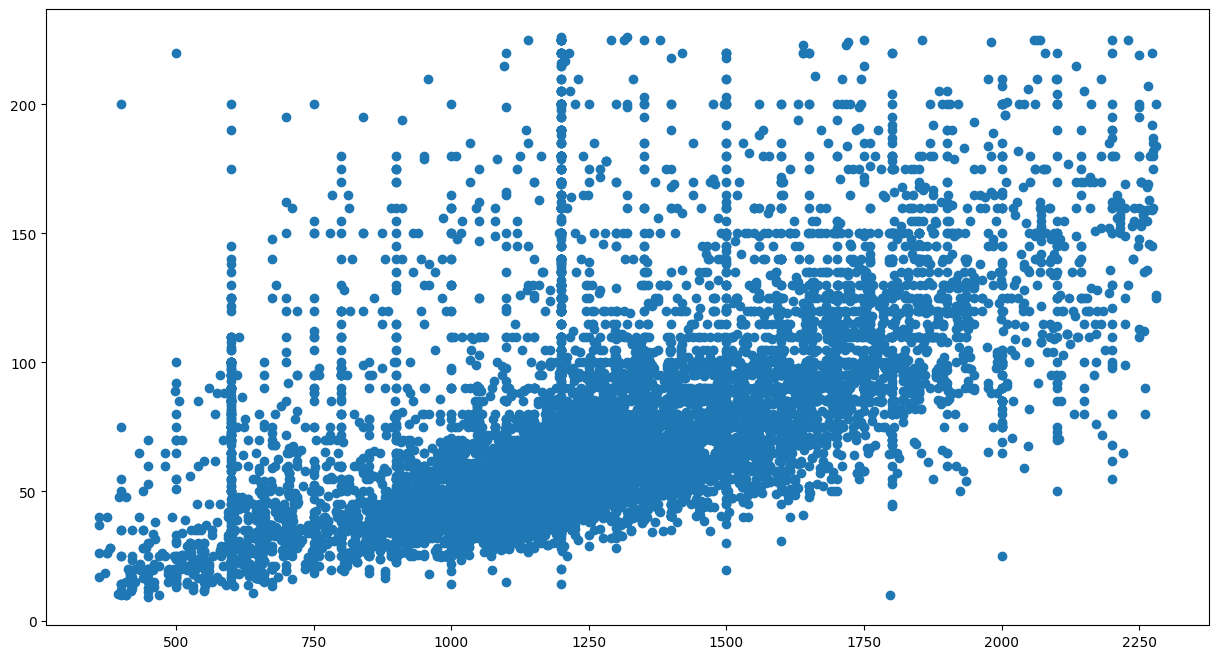

In [34]:
plt.figure(figsize=(15,8))
plt.scatter(df1['Final_sqft'],df1['price'])

In [35]:
X = df1[['location','bath','balcony','BuiltUp_Area','Plot_Area','Carpet_Area','BedRoom','Hall','Kitchen','Final_sqft']]
Y = df1[['price']]
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=89)
ohe = OneHotEncoder()
ohe.fit(X[['location']])
col_transform = make_column_transformer((OneHotEncoder(categories=ohe.categories_), ['location']), remainder='passthrough')
lr = LinearRegression()
pipe = make_pipeline(col_transform,lr)
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
r2_score(y_test,y_pred)

0.6635739102648983

In [36]:
df2 = df.copy()

In [37]:
pq99 = df['price'].quantile(0.99)
q99 = df['Final_sqft'].quantile(0.99)

In [38]:
df2 = df2[df2['price']<pq99]
df2 = df2[df2['Final_sqft']<q99]

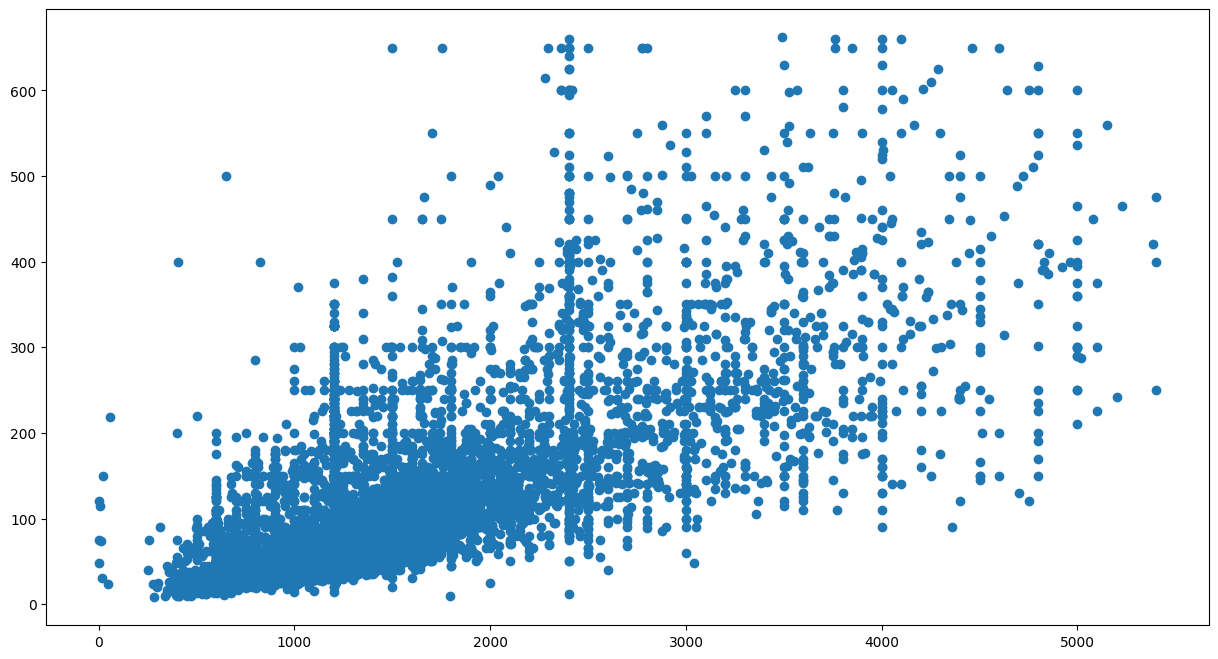

In [39]:
plt.figure(figsize=(15,8))
plt.scatter(df2['Final_sqft'],df2['price'])

In [40]:
X = df2[['location','bath','balcony','BuiltUp_Area','Plot_Area','Carpet_Area','BedRoom','Hall','Kitchen','Final_sqft']]
Y = df2[['price']]
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=62)
ohe = OneHotEncoder()
ohe.fit(X[['location']])
col_transform = make_column_transformer((OneHotEncoder(categories=ohe.categories_), ['location']), remainder='passthrough')
lr = LinearRegression()
pipe = make_pipeline(col_transform,lr)
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
r2_score(y_test,y_pred)

0.698517253836199

In [41]:
df3 = df.copy()

In [42]:
df3['price'] = df3['price'].apply(lambda x : pq99 if x >pq99 else x)
df3['Final_sqft'] = df3['Final_sqft'].apply(lambda x : q99 if x >q99 else x)

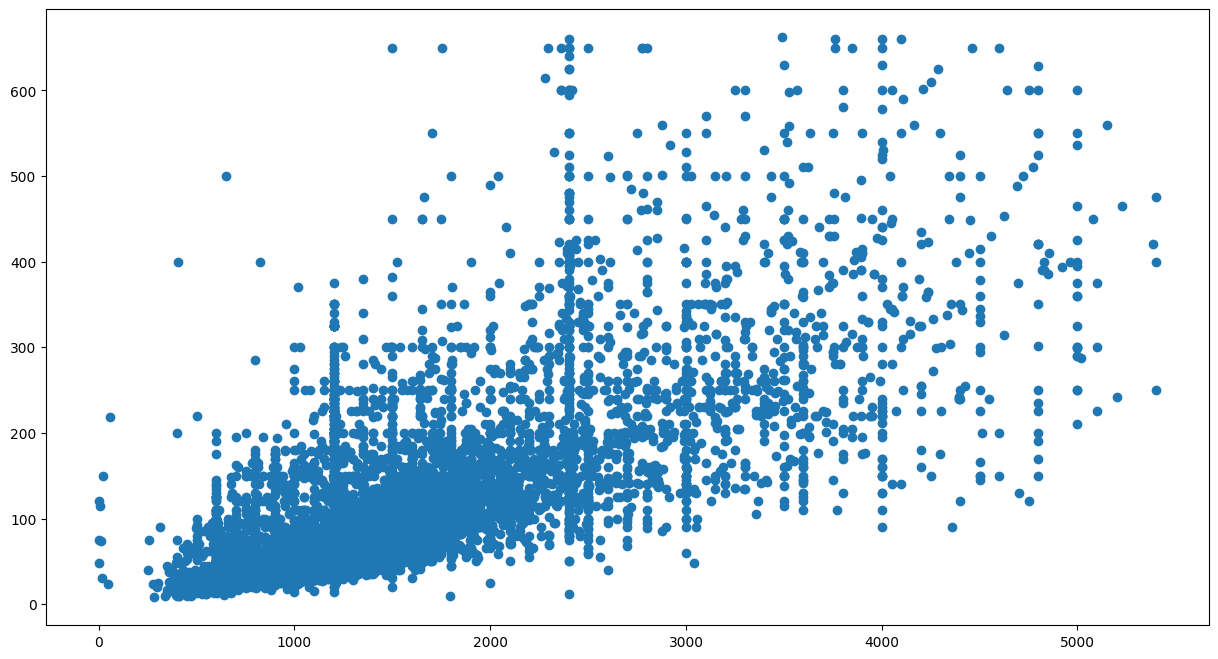

In [43]:
plt.figure(figsize=(15,8))
plt.scatter(df2['Final_sqft'],df2['price'])

In [44]:
X = df3[['location','bath','balcony','BuiltUp_Area','Plot_Area','Carpet_Area','BedRoom','Hall','Kitchen','Final_sqft']]
Y = df3[['price']]
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=95)
ohe = OneHotEncoder()
ohe.fit(X[['location']])
col_transform = make_column_transformer((OneHotEncoder(categories=ohe.categories_), ['location']), remainder='passthrough')
lr = LinearRegression()
pipe = make_pipeline(col_transform,lr)
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
r2_score(y_test,y_pred)

0.7630951960526745